In [1]:
%%capture
%cd ..

In [2]:
import pandas as pd
from utils import constants as cs
import matplotlib.pyplot as plt
import os

In [3]:
ds_root = 'dataset/hi'


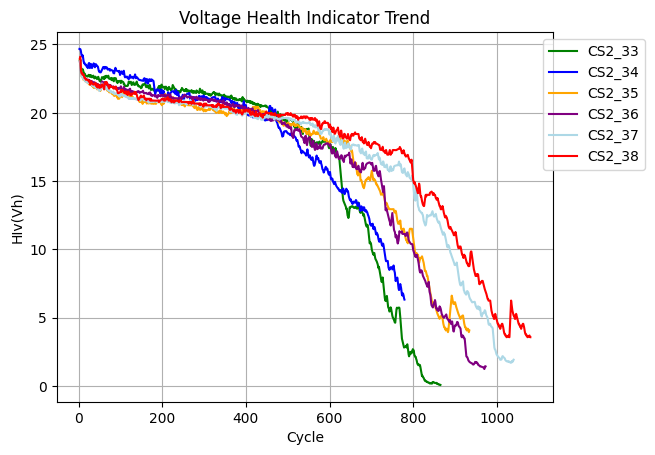

In [4]:
# Lista dei colori che vuoi utilizzare per le curve
colors = ['red', 'green', 'blue', 'orange', 'purple', 'lightblue']

# Inizializza il plot
plt.figure()

# Lista per i nomi dei file
file_names = []

# Loop attraverso i file in ds_root
for i, file_name in enumerate(os.listdir(ds_root)):
    file_path = os.path.join(ds_root, file_name)
    if 'hiv' in file_path:
        
        # Leggi il DataFrame dal file
        df = pd.read_csv(file_path)
        
        # Calcola la differenza consecutiva per la colonna 'hi_v'
        diff_hi_v = df['hi_v'].diff()
        
        # Applica una condizione per filtrare i dati
        selected_rows = df[abs(diff_hi_v) <= .2]
        cs2x_part = file_name.split('hiv-charge-')[1].split('.csv')[0]
        # Traccia la curva utilizzando un colore dalla lista colors
        plt.plot(selected_rows['cycle'], selected_rows['hi_v'], label=f'{cs2x_part}', linestyle='-', color=colors[i % len(colors)])
        
        # Aggiungi il nome del file alla lista
        file_names.append(cs2x_part)

# Aggiungi titoli e legenda
plt.title('Voltage Health Indicator Trend')
plt.xlabel('Cycle')
plt.ylabel('HIv(Vh)')
plt.grid(True)

# Sposta la legenda in alto a destra senza che esca dalla figura
plt.legend(file_names, loc='upper right', bbox_to_anchor=(1.2, 1.))

plt.show()

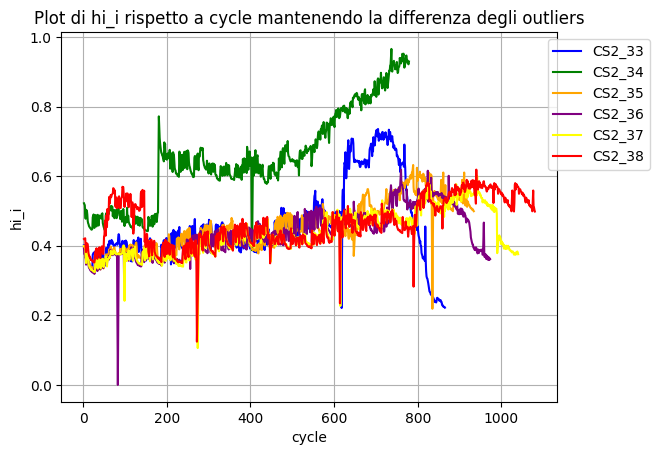

In [8]:
# Lista dei colori che vuoi utilizzare per le curve
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']

# Inizializza il plot
plt.figure()

# Lista per i nomi dei file
# file_names = []

# Loop attraverso i file in ds_root
for i, file_name in enumerate(os.listdir(ds_root)):
    file_path = os.path.join(ds_root, file_name)
    if 'hii' in file_path:
    
        # Leggi il DataFrame dal file
        df = pd.read_csv(file_path)
        
        # Calcola la differenza consecutiva per la colonna 'hi_i'
        diff_hi_i = df['hi_i'].diff()
        
        # Applica una condizione per filtrare i dati
        selected_rows = df[abs(diff_hi_i) <= 0.2]
        
        # Traccia la curva utilizzando un colore dalla lista colors
        plt.plot(selected_rows['cycle'], selected_rows['hi_i'], label=f'File {file_name}', linestyle='-', color=colors[i % len(colors)])

        
        # Aggiungi il nome del file alla lista
        # file_names.append(file_name)

# Aggiungi titoli e legenda
plt.title('Plot di hi_i rispetto a cycle mantenendo la differenza degli outliers')
plt.xlabel('cycle')
plt.ylabel('hi_i')
plt.grid(True)

# Sposta la legenda in alto a destra senza che esca dalla figura
plt.legend(file_names, loc='upper right', bbox_to_anchor=(1.2, 1.))

plt.show()


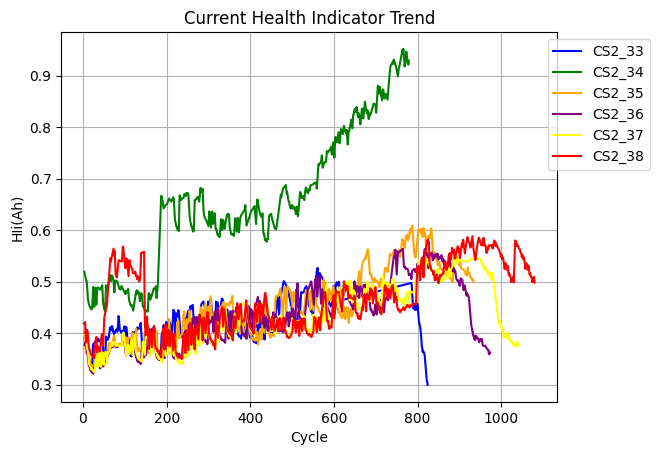

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lista dei colori che vuoi utilizzare per le curve
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']

# Inizializza il plot
plt.figure()

# Cartella radice dei dataset
# ds_root = 'percorso/alla/tua/cartella/dei/dataset'
ds_root = 'dataset/hi'

# Lista per i nomi dei file
# file_names = []

# Funzione per calcolare la deviazione mediana assoluta
def mad(data):
    median = np.median(data)
    return np.median(np.abs(data - median))

# Loop attraverso i file in ds_root
for i, file_name in enumerate(os.listdir(ds_root)):
    file_path = os.path.join(ds_root, file_name)
    if 'hii' in file_path:
    
        # Leggi il DataFrame dal file
        df = pd.read_csv(file_path)
        
        # Calcola la differenza consecutiva per la colonna 'hi_i'
        diff_hi_i = df['hi_i'].diff()
        
        # Applica una condizione per filtrare i dati
        selected_rows = df[abs(diff_hi_i) <= 0.009]
        
        # Calcola il valore MAD per la colonna 'hi_i'
        threshold = 3 * mad(selected_rows['hi_i'])
        
        # Applica il filtro per eliminare gli outlier basato sul MAD
        selected_rows_filtered = selected_rows[np.abs(selected_rows['hi_i'] - selected_rows['hi_i'].median()) <= threshold]
        
        cs2x_part = file_name.split('hii-charge-')[1].split('.csv')[0]
        
        # Traccia la curva utilizzando i dati filtrati
        plt.plot(selected_rows_filtered['cycle'], selected_rows_filtered['hi_i'], label=f'{cs2x_part}', linestyle='-', color=colors[i % len(colors)])

        
        # Aggiungi il nome del file alla lista
        file_names.append(file_name)

# Aggiungi titoli e legenda
plt.title('Current Health Indicator Trend')
plt.xlabel('Cycle')
plt.ylabel('HIi(Ah)')
plt.grid(True)

# Sposta la legenda in alto a destra senza che esca dalla figura
plt.legend(file_names, loc='upper right', bbox_to_anchor=(1.2, 1.))

plt.show()
